<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/notebooks/M2_Bipartite_graphs_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarity and Bipartite Networks with Python and NetworkX
This notebook is an introduction to the concept and syntax around similarity and bipartite networks

For a more detailed intro to advanced network structures consider Daniel Hain's videos (in R) 
* [Similarity networks and more](https://www.loom.com/share/7668a71c95f941a1a17148e45ba83689)
* [Multimodla networks](https://www.loom.com/share/2fdf16a87a9d4eac81d50cef0b55ae3b)


In [56]:
# Packaging

import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_distances

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

## Similarity networks

Can be constructed by mapping similarity between all observarions.
Here we are going to use cosine distances

In [57]:
# load cars data
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

In [58]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [59]:
# Scale values

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

data_num = scl.fit_transform(data.iloc[:,1:])

In [60]:
# Calculate distances into a square matrix
dist = cosine_distances(data_num,data_num)

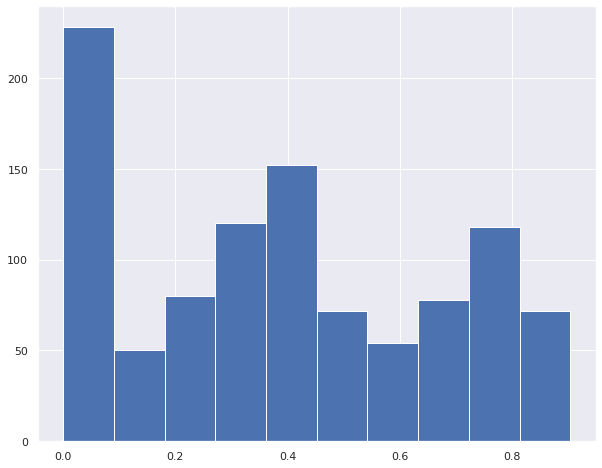

In [61]:
pd.Series(dist.flatten()).hist()

In [65]:
1-dist

array([[1.        , 0.99833341, 0.72651485, ..., 0.94244877, 0.85884684,
        0.75915505],
       [0.99833341, 1.        , 0.73180875, ..., 0.93762875, 0.85467944,
        0.76613321],
       [0.72651485, 0.73180875, 1.        , ..., 0.65012275, 0.49604584,
        0.99155606],
       ...,
       [0.94244877, 0.93762875, 0.65012275, ..., 1.        , 0.9336236 ,
        0.68969623],
       [0.85884684, 0.85467944, 0.49604584, ..., 0.9336236 , 1.        ,
        0.55351352],
       [0.75915505, 0.76613321, 0.99155606, ..., 0.68969623, 0.55351352,
        1.        ]])

In [66]:
# calculate a cutoff (for a less crowded network)
perc = np.percentile(1-dist, 60)

In [67]:
# create NW
G = nx.from_numpy_array(1-dist)

In [70]:
G.remove_edges_from(nx.selfloop_edges(G))

In [68]:
# add names

attributes_dict=data.iloc[:,0].T.to_dict()
nx.set_node_attributes(G, attributes_dict, 'model')

In [71]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 0.9983334074134708}), (0, 2, {'weight': 0.7265148534364343}), (0, 3, {'weight': 0.40417717075048687}), (0, 4, {'weight': 0.5531079566142614}), (0, 5, {'weight': 0.3540647078536826}), (0, 6, {'weight': 0.5492497985409216}), (0, 7, {'weight': 0.46559015699535533}), (0, 8, {'weight': 0.46267616838316794}), (0, 9, {'weight': 0.5864219053486195}), (0, 10, {'weight': 0.5792955023947762}), (0, 11, {'weight': 0.5628503330603976}), (0, 12, {'weight': 0.5710640287449842}), (0, 13, {'weight': 0.558671750400625}), (0, 14, {'weight': 0.48801531366055395}), (0, 15, {'weight': 0.49281760666624685}), (0, 16, {'weight': 0.5367948488653197}), (0, 17, {'weight': 0.720621714801063}), (0, 18, {'weight': 0.7372415274058736}), (0, 19, {'weight': 0.7127128895755293}), (0, 20, {'weight': 0.33546590986297675}), (0, 21, {'weight': 0.5045923860860984}), (0, 22, {'weight': 0.5459321142443965}), (0, 23, {'weight': 0.574186960926527}), (0, 24, {'weight': 0.540272121018439}), (0, 25, {

In [72]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 496
Average degree:  31.0000


In [73]:
# Get rid of low-weight edges
G_sub = nx.edge_subgraph(G, [(u,v) for u,v,d in G.edges(data=True) if d['weight'] > perc])

In [74]:
print(nx.info(G_sub))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 189
Average degree:  11.8125


In [75]:
# identify communities (optional)
import community as community_louvain

partition = community_louvain.best_partition(G_sub)
nx.set_node_attributes(G_sub, partition, 'partition')

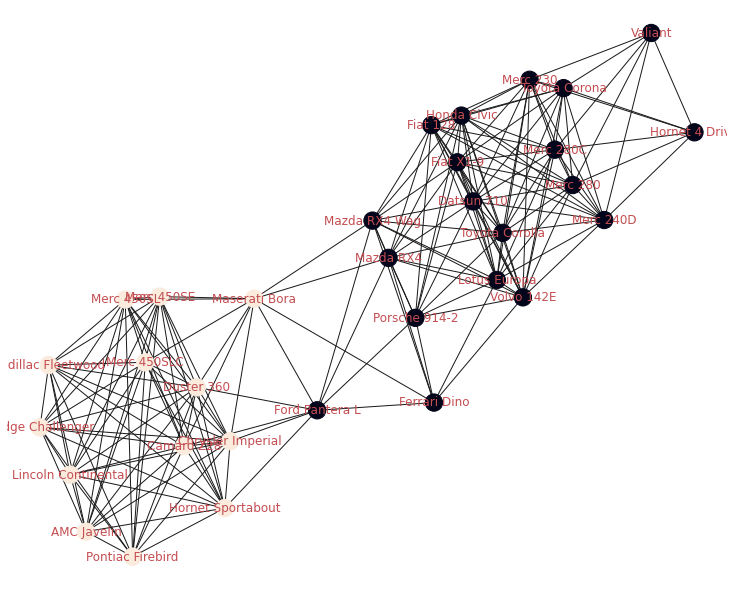

In [76]:
nx.draw_kamada_kawai(G_sub, 
               node_color=list(partition.values()), 
               with_labels = True, 
               labels=attributes_dict, 
               font_color='r')

In [ ]:
# For visualization
!pip install -U bokeh
!pip install -q holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
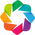

In [77]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [78]:
graph = hv.Graph.from_networkx(G_sub, nx.layout.fruchterman_reingold_layout).opts(
                                                                        tools=['hover'],
                                                                        #directed=True,
                                                                        edge_alpha=0.2,
                                                                        #node_size='cent_degree',
                                                                        node_color='partition', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

labels = hv.Labels(graph.nodes, ['x', 'y'], 'model')

show(hv.render((graph * labels.opts(text_font_size='8pt', text_color='black', bgcolor='white'))))

## Multi-modal networks
In this example we are going to look at bipartite networks

In [79]:
people = ['Jesper', 'Pernille', 'Morten', 'Lise', 'Christian', 'Mette', 'Casper', 'Dorte', 'Jacob', 'Helle']
places = ['Yoga House', 'Crossfit', 'Jazz Club', 'Jomfru Anne Gade']

In [80]:
# some more imports that will be useful
from networkx.algorithms import bipartite
import itertools
import random

In [81]:
# Creating a random bipartite network of people and places
combinations = list(itertools.product(people, places))
connections = random.sample(combinations, 15)

In [83]:
c0 = set([c[0] for c in connections])
c1 = set([c[1] for c in connections])

In [86]:
B = nx.Graph()

In [87]:
# add nodes and edges in their modes
B.add_nodes_from(c0, bipartite=0)
B.add_nodes_from(c1, bipartite=1)
B.add_edges_from(connections)

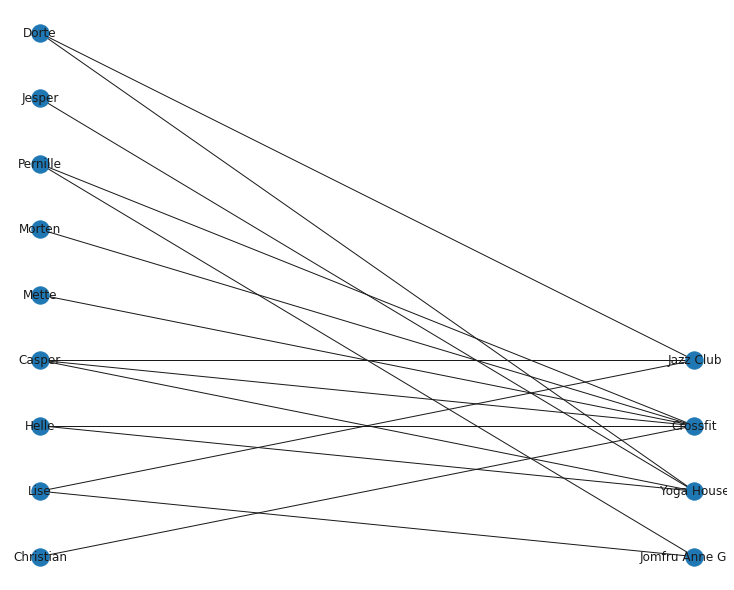

In [88]:
# very clunky visualization of 2-mode networks (unfortunately)
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos, with_labels=True)
plt.show()

In [89]:
# projecting onto people
B_people = bipartite.weighted_projected_graph(B, c0)

In [90]:
# projecting onto places
B_places = bipartite.weighted_projected_graph(B, c1)

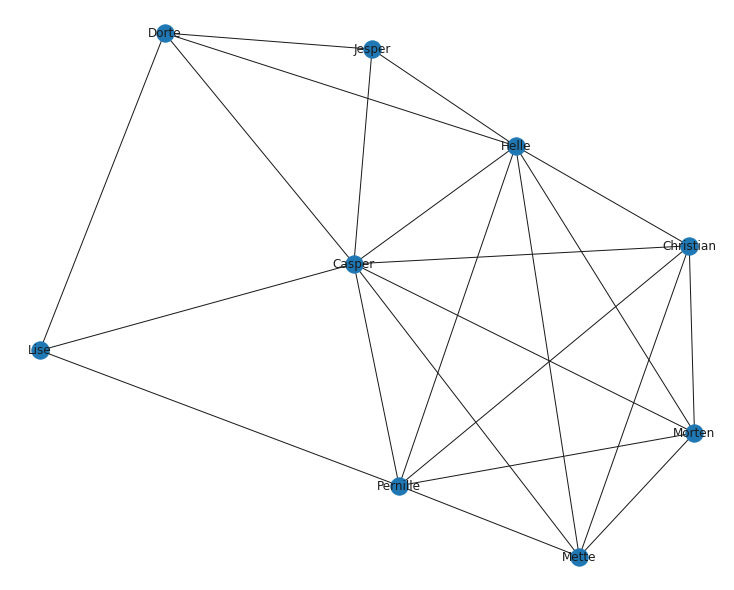

In [91]:
nx.draw(B_people, with_labels=True)

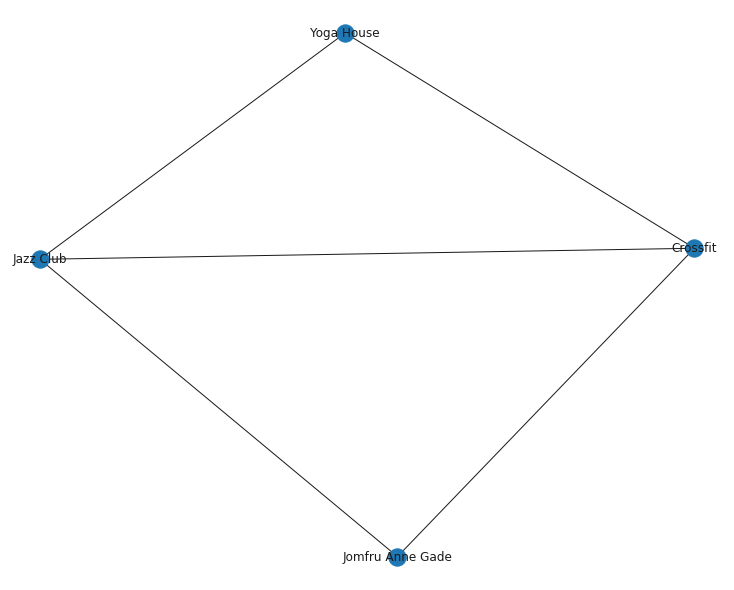

In [92]:
nx.draw(B_places, with_labels=True)

In [93]:
# pull edges
edges_df = nx.to_pandas_edgelist(B)

In [94]:
edges_df

,source,target
0,Christian,Crossfit
1,Lise,Jomfru Anne Gade
2,Lise,Jazz Club
3,Casper,Crossfit
4,Casper,Yoga House
5,Casper,Jazz Club
6,Helle,Yoga House
7,Helle,Crossfit
8,Morten,Crossfit
9,Mette,Crossfit


In [95]:
# create matrix from edges
adj_df = pd.crosstab(edges_df.source, edges_df.target)

In [96]:
adj_df

target,Crossfit,Jazz Club,Jomfru Anne Gade,Yoga House
source,,,,
Casper,1,1,0,1
Christian,1,0,0,0
Dorte,0,1,0,1
Helle,1,0,0,1
Jesper,0,0,0,1
Lise,0,1,1,0
Mette,1,0,0,0
Morten,1,0,0,0
Pernille,1,0,1,0


In [97]:
# Projecting with dot-product as alternative
pd.DataFrame(np.dot(adj_df, adj_df.T), index=adj_df.index, columns=adj_df.index)

source,Casper,Christian,Dorte,Helle,Jesper,Lise,Mette,Morten,Pernille
source,,,,,,,,,
Casper,3,1,2,2,1,1,1,1,1
Christian,1,1,0,1,0,0,1,1,1
Dorte,2,0,2,1,1,1,0,0,0
Helle,2,1,1,2,1,0,1,1,1
Jesper,1,0,1,1,1,0,0,0,0
Lise,1,0,1,0,0,2,0,0,1
Mette,1,1,0,1,0,0,1,1,1
Morten,1,1,0,1,0,0,1,1,1
Pernille,1,1,0,1,0,1,1,1,2


In [98]:
nx.to_pandas_adjacency(B_people)

,Christian,Lise,Casper,Helle,Morten,Mette,Pernille,Jesper,Dorte
Christian,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Lise,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
Casper,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0
Helle,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
Morten,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
Mette,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
Pernille,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Jesper,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Dorte,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
